[한국전력공사\_공동주택 전력·기상 융합데이터\_20221231 | 공공데이터포털](https://www.data.go.kr/data/15120804/fileData.do)

한국전력공사_공동주택 전력·기상 융합데이터
한국전력공사와 기상청이 공동주택 부하관리관련 연구개발 활성화를 목적으로 제공하는 데이터셋입니다.
데이터셋은 기상청 동네예보 격자단위 시간대별 공동주택 전력부하와 기상관측값을 포함하고 있습니다.
공동주택 전력부하는 각 연도별 결측치가 없는 단지에 한하여 합계한 통계값이며, 격자내 공동주택이 10개 이상인 격자에 대해서만 제공하고 있습니다.

In [26]:
import os
import pandas as pd
import seaborn as sns
import koreanize_matplotlib
import matplotlib.pyplot as plt

data_folder = 'data'
csv_files = [f for f in os.listdir(data_folder) if f.endswith('.csv')]

df_year = []
for csv_file in csv_files:
    file_path = os.path.join(data_folder, csv_file)
    df_temp = pd.read_csv(file_path, encoding="cp949")
    df_year.append(df_temp)

df = pd.concat(df_year)
df.shape

(6006735, 14)

In [27]:
df

,X격자,Y격자,위도,경도,연도,월,일,시,계약전력합계,공동주택수,전력부하합계,기온,상대습도,풍속
0,86,68,34.843570,128.398978,2022,1,1,1,11850,18,1728.52,-1.5,31.0,1.7
1,86,68,34.843570,128.398978,2022,1,1,2,11850,18,1568.96,-1.2,31.0,1.7
2,86,68,34.843570,128.398978,2022,1,1,3,11850,18,1431.84,-1.6,32.0,2.5
3,86,68,34.843570,128.398978,2022,1,1,4,11850,18,1503.36,-2.3,33.0,2.3
4,86,68,34.843570,128.398978,2022,1,1,5,11850,18,1490.96,-1.9,35.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,69,100,36.330262,127.483909,2020,5,16,11,17650,10,2792.28,18.3,NaN,1.0
1048571,69,100,36.330262,127.483909,2020,5,16,12,17650,10,2754.68,19.3,NaN,1.6
1048572,69,100,36.330262,127.483909,2020,5,16,13,17650,10,2692.52,19.9,NaN,2.1
1048573,69,100,36.330262,127.483909,2020,5,16,14,17650,10,2603.72,20.8,NaN,1.6


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6006735 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column  Dtype  
---  ------  -----  
 0   X격자     int64  
 1   Y격자     int64  
 2   위도      float64
 3   경도      float64
 4   연도      int64  
 5   월       int64  
 6   일       int64  
 7   시       int64  
 8   계약전력합계  int64  
 9   공동주택수   int64  
 10  전력부하합계  float64
 11  기온      float64
 12  상대습도    float64
 13  풍속      float64
dtypes: float64(6), int64(8)
memory usage: 687.4 MB


In [29]:
df.describe()

,X격자,Y격자,위도,경도,연도,월,일,시,계약전력합계,공동주택수,전력부하합계,기온,상대습도,풍속
count,6.006735e+06,6.006735e+06,6.006735e+06,6.006735e+06,6.006735e+06,6.006735e+06,6.006735e+06,6.006735e+06,6.006735e+06,6.006735e+06,6.006735e+06,5.621425e+06,5.094900e+06,5.611912e+06
mean,7.271509e+01,1.003405e+02,3.633988e+01,1.276888e+02,2.021215e+03,6.521832e+00,1.572636e+01,1.249999e+01,5.878129e+04,3.928523e+01,8.887135e+03,1.372986e+01,6.756960e+01,1.701439e+00
std,1.603085e+01,2.216223e+01,1.028095e+00,8.964417e-01,7.195856e-01,3.448749e+00,8.798889e+00,6.922186e+00,5.253241e+04,3.883718e+01,8.133770e+03,1.032516e+01,2.143895e+01,1.362594e+00
min,5.000000e+01,3.300000e+01,3.327313e+01,1.263904e+02,2.020000e+03,1.000000e+00,1.000000e+00,1.000000e+00,5.475000e+03,1.000000e+01,3.720400e+02,-2.520000e+01,1.000000e+00,0.000000e+00
25%,5.900000e+01,7.700000e+01,3.525138e+01,1.269318e+02,2.021000e+03,4.000000e+00,8.000000e+00,6.000000e+00,2.280000e+04,1.500000e+01,3.379000e+03,5.900000e+00,5.170000e+01,7.000000e-01
50%,6.500000e+01,9.900000e+01,3.628593e+01,1.272548e+02,2.021000e+03,7.000000e+00,1.600000e+01,1.200000e+01,4.004000e+04,2.500000e+01,6.076520e+03,1.470000e+01,6.940000e+01,1.400000e+00
75%,8.900000e+01,1.230000e+02,3.739599e+01,1.285862e+02,2.022000e+03,1.000000e+01,2.300000e+01,1.800000e+01,7.673500e+04,4.800000e+01,1.175388e+04,2.230000e+01,8.600000e+01,2.400000e+00
max,1.040000e+02,1.410000e+02,3.819806e+01,1.294381e+02,2.022000e+03,1.200000e+01,3.100000e+01,2.400000e+01,3.185520e+05,3.070000e+02,1.107742e+05,3.850000e+01,1.000000e+02,3.300000e+01


In [30]:
corr = df.corr()
corr

,X격자,Y격자,위도,경도,연도,월,일,시,계약전력합계,공동주택수,전력부하합계,기온,상대습도,풍속
X격자,1.000000e+00,-5.282522e-01,-5.406988e-01,9.997481e-01,-0.233335,-2.476284e-04,4.559410e-04,3.762135e-07,-0.154850,-0.129599,-0.172236,0.058850,-0.087580,0.138829
Y격자,-5.282522e-01,1.000000e+00,9.998880e-01,-5.119016e-01,0.290926,4.952042e-04,-5.581353e-04,2.494181e-08,0.246995,0.196335,0.252081,-0.083975,-0.004533,-0.192154
위도,-5.406988e-01,9.998880e-01,1.000000e+00,-5.244885e-01,0.292293,4.938494e-04,-5.610188e-04,1.517966e-08,0.247189,0.196624,0.252582,-0.084260,-0.002977,-0.193106
경도,9.997481e-01,-5.119016e-01,-5.244885e-01,1.000000e+00,-0.229587,-2.428453e-04,4.480965e-04,3.710618e-07,-0.153651,-0.129048,-0.170985,0.057511,-0.088337,0.135672
연도,-2.333350e-01,2.909262e-01,2.922928e-01,-2.295870e-01,1.000000,2.053838e-03,-1.114981e-03,2.740629e-06,0.017227,-0.003423,0.013235,-0.028118,-0.054527,-0.030669
월,-2.476284e-04,4.952042e-04,4.938494e-04,-2.428453e-04,0.002054,1.000000e+00,1.096101e-02,7.163532e-07,0.000577,0.000528,0.007188,0.204038,0.173537,-0.079856
일,4.559410e-04,-5.581353e-04,-5.610188e-04,4.480965e-04,-0.001115,1.096101e-02,1.000000e+00,-5.048649e-08,-0.000085,-0.000051,-0.001138,0.010367,0.010653,-0.005161
시,3.762135e-07,2.494181e-08,1.517966e-08,3.710618e-07,0.000003,7.163532e-07,-5.048649e-08,1.000000e+00,0.000001,0.000001,0.179629,0.114134,-0.206020,0.115224
계약전력합계,-1.548499e-01,2.469951e-01,2.471885e-01,-1.536512e-01,0.017227,5.770180e-04,-8.526269e-05,1.271063e-06,1.000000,0.908681,0.904673,0.007052,-0.058664,-0.044398
공동주택수,-1.295990e-01,1.963349e-01,1.966241e-01,-1.290477e-01,-0.003423,5.283815e-04,-5.069005e-05,1.224118e-06,0.908681,1.000000,0.831194,0.014268,-0.066020,-0.022477


<Axes: >

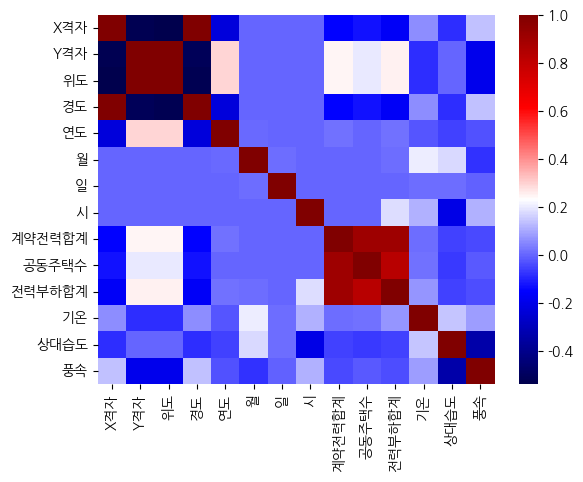

In [31]:
sns.heatmap(corr, cmap='seismic')